In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from picamera.array import PiRGBArray
from picamera import PiCamera

def pltShow(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

#camera = PiCamera()
#camera.resolution = (640, 480)

#camera.capture('temp.jpg')

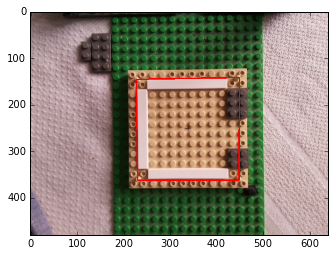

In [10]:
upper_left = (227, 146)
upper_right = (448, 142)
down_left = (230, 362)
down_right = (447, 362)

frame = cv2.imread("temp.jpg")
f = frame.copy()
cv2.line(f, upper_left, upper_right, (0, 0, 255), 2)
cv2.line(f, upper_right, down_right, (0, 0, 255), 2)
cv2.line(f, down_right, down_left, (0, 0, 255), 2)
cv2.line(f, down_left, upper_left, (0, 0, 255), 2)

cv2.imwrite("images/carre.jpg", f)

pltShow(f)

In [4]:
camera.close()

NameError: name 'camera' is not defined

In [11]:
def buildPositions(n, bordure, largeurTotale):
    poses = []
    for mcx in range(n):
        for mcy in range(n):
            poses.append((mcx,
                          mcy,
                          int(bordure+(largeurTotale-2*bordure)/(n-1)*mcx),
                          int(bordure+(largeurTotale-2*bordure)/(n-1)*mcy)))
    return poses


inCorners = np.float32([[upper_left[0], upper_left[1]],
                        [upper_right[0], upper_right[1]],
                        [down_left[0], down_left[1]],
                        [down_right[0], down_right[1]]])

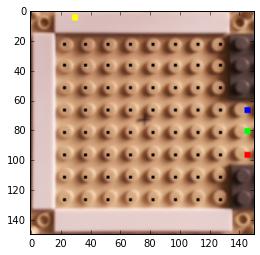

In [12]:
final_size = 150
nombre_de_points = 8
bordure = 23

garden = (67, 145)
fountain = (81, 145)
house = (97, 145)

pointToWatch = (5, 30)

# Ne pas toucher dessous
positions = buildPositions(nombre_de_points, bordure, final_size)
outCorners = np.float32([[0, 0], [final_size, 0], [0, final_size], [final_size, final_size]])
M = cv2.getPerspectiveTransform(inCorners, outCorners)
p = cv2.warpPerspective(frame, M, (final_size, final_size))

for (mcx, mcy, x, y) in positions:
    p[x-1:x+1, y-1:y+1] = (0, 0, 0)
p[pointToWatch[0]-2:pointToWatch[0]+2,
  pointToWatch[1]-2:pointToWatch[1]+2] = (0, 255, 255)
p[garden[0]-2:garden[0]+2, garden[1]-2:garden[1]+2] = (255, 0, 0)
p[fountain[0]-2:fountain[0]+2, fountain[1]-2:fountain[1]+2] = (0, 255, 0)
p[house[0]-2:house[0]+2, house[1]-2:house[1]+2] = (0, 0, 255)

cv2.imwrite("images/frd.jpg", p)

pltShow(p)